In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import k_means, kmeans_plusplus, KMeans
from sklearn.decomposition import PCA
import math 
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

In [2]:
#Display multiple digits
def showDigits(digits, labels, indexes, size=28):
    #Make a grid that is the right size
    pics = len(indexes)
    cols = 6
    rows = math.ceil(pics/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14,6))
    plt.axis("off")

    #loop through the list of indexes, grab images and labels, plot in the "next" spot. 
    for i in range(0, pics):
        n = indexes[i]
        some_digit = digits[n:n+1]
        some_digit_image = np.array(some_digit).reshape(size, size)
        ax = axes[i//cols, i%cols]
        ax.axis("off")
        ax.imshow(some_digit_image, cmap=mpl.cm.binary)
        ax.set_title('Ind: {} - Lbl: {}'.format(indexes[i], labels[i]))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

In [3]:
#Load Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
#mnist = mnist[0:15000]
X = mnist["data"]
print(X.shape)

(70000, 784)


In [4]:
kmeans=KMeans(n_clusters=10, random_state=42)
clusters=kmeans.fit(X)

y_kmeans=kmeans.predict(X)
centers=kmeans.cluster_centers_
centers.shape

(10, 784)

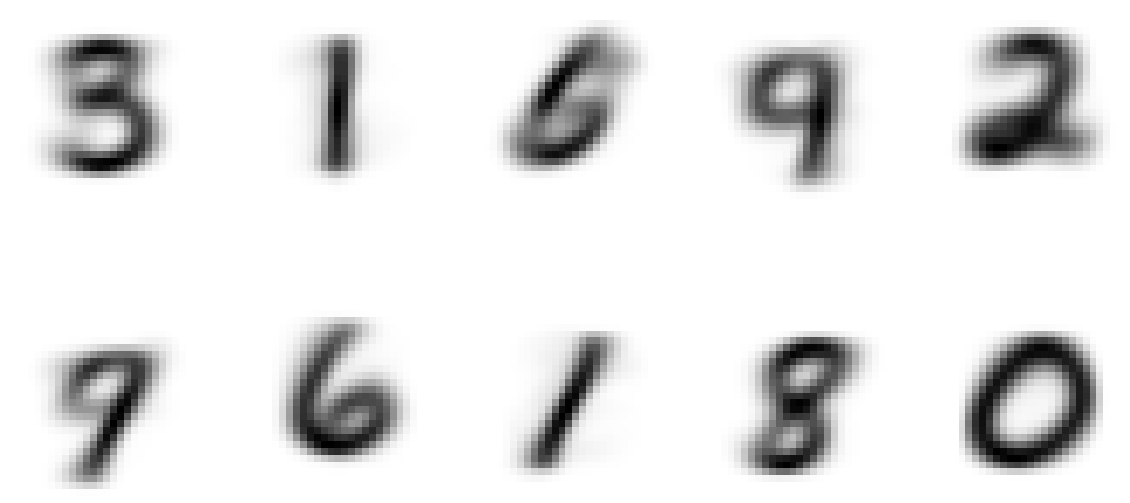

In [6]:
centers = centers.reshape(10,28,28)
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [8]:
# Assign labels to clusters based on the majority class


new_labels = np.zeros_like(clusters2)
for i in range(10):
    mask = (clusters2 == i)
    new_labels[mask] = np.argmax(np.bincount(mnist.target[mask].astype(int)))

# Add the new labels to the data
    new_data = np.c_[X, new_labels]

NameError: name 'clusters2' is not defined